In [1]:
import requests
import configparser
import telegram
from flask import Flask, request
from telegram.ext import Dispatcher, MessageHandler, Filters, Updater, CommandHandler, InlineQueryHandler, CommandHandler
from fugle_realtime import intraday
from datetime import datetime,timedelta
import pandas as pd
import sys
import matplotlib.pyplot as plt
import time
import networkx as nx

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [3]:
access_token = config['TELEGRAM']['ACCESS_TOKEN']
webhook_url = config['TELEGRAM']['WEBHOOK_URL']

In [4]:
requests.post('https://api.telegram.org/bot'+access_token+'/deleteWebhook').text

'{"ok":true,"result":true,"description":"Webhook was deleted"}'

In [5]:
requests.post('https://api.telegram.org/bot'+access_token+'/setWebhook?url='+webhook_url+'/hook').text

'{"ok":true,"result":true,"description":"Webhook was set"}'

In [6]:
df = pd.read_excel('/Users/Rebeca/0319_ntu_scu/fugle_telegram_chatbot/symbol_info.xlsx')

In [227]:
df

,category,industry,market,off_date,symbol_id
0,stock,貿易百貨,tw.otc,NaN,2937
1,stock,電子零組件業,tw.tse,NaN,4989
2,stock,農業科技,tw.otc,NaN,1240
3,stock,食品工業,tw.otc,NaN,1796
4,stock,航運業,tw.tse,NaN,2630
5,stock,航運業,tw.tse,NaN,8367
6,stock,電機機械,tw.otc,NaN,4561
7,stock,生技醫療業,tw.tse,NaN,4148
8,stock,電機機械,tw.tse,NaN,4552
9,stock,電機機械,tw.tse,NaN,4560


### 匯入20大股票代碼名稱

In [183]:
f = open('/Users/Rebeca/Fintech_中信專案/成交金額前20大.txt')
stock=[]
for i in f:
    stock.append(i.split("\n")[0])
f.close()

In [186]:
stock_name=[]
stock_num=[]
for i in range(0,len(stock),2):
    stock_num.append('/'+stock[i])
    stock_name.append(stock[i+1])

In [187]:
stock_num

['/2330',
 '/2454',
 '/3661',
 '/3105',
 '/6531',
 '/4968',
 '/2458',
 '/2337',
 '/6488',
 '/6415',
 '/2408',
 '/4966',
 '/6510',
 '/2379',
 '/5274',
 '/5269',
 '/6462',
 '/2303',
 '/3016',
 '/8086']

In [188]:
d = {'symbol':stock_num,'name':stock_name}
stock_i=pd.DataFrame(d)

In [189]:
stock_i.to_csv('成交金額前20大.csv')

# 測試功能

In [190]:
data['time'] = data['at'] - data['at'][0]
data['date'] = data['at'] - data['at'][0] + timedelta(hours=9) + timedelta(minutes=1)
def abc(aa):
    aa['time'] = aa['time'].seconds/60+1
    aa['time'] = int(aa['time'])
    aa['date'] = str(aa['date']).split(' ')[2]
    return aa
data.head()


,at,close,high,low,open,unit,volume,time,date
0,2020-06-09 01:01:00+00:00,316.0,317.0,316.0,316.5,3469,3469000,00:00:00,09:01:00
1,2020-06-09 01:02:00+00:00,316.0,316.5,316.0,316.0,281,281000,00:01:00,09:02:00
2,2020-06-09 01:03:00+00:00,315.5,316.5,315.5,316.0,408,408000,00:02:00,09:03:00
3,2020-06-09 01:04:00+00:00,315.0,316.0,315.0,315.5,397,397000,00:03:00,09:04:00
4,2020-06-09 01:05:00+00:00,315.0,315.5,315.0,315.5,358,358000,00:04:00,09:05:00


In [39]:
data = data.apply(abc,axis=1)
data

In [43]:
stock='2330'
meta = intraday.meta(apiToken=api,symbolId=stock,output='raw')
priceLowLimit = meta['priceLowLimit']
priceHighLimit = meta['priceHighLimit']
priceReference = meta['priceReference']
meta

{'canDayBuySell': True,
 'canDaySellBuy': True,
 'canShortLend': True,
 'canShortMargin': True,
 'currency': 'TWD',
 'industryZhTw': '半導體業',
 'isIndex': False,
 'isSuspended': False,
 'isTerminated': False,
 'isWarrant': False,
 'nameZhTw': '台積電',
 'priceHighLimit': 349.5,
 'priceLowLimit': 286.5,
 'priceReference': 318,
 'typeZhTw': '一般股票',
 'volumePerUnit': 1000}

In [45]:
x = list(data['time'])
y = data['close']

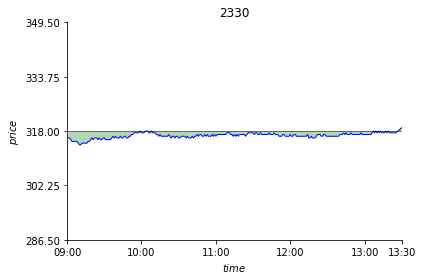

In [46]:
plt.figure()
plt.plot(x, y, color='b', linewidth=1.0)
plt.xticks([0,60,120,180,240,270],['09:00','10:00','11:00','12:00','13:00','13:30'])
plt.yticks([priceLowLimit,(priceLowLimit+priceReference)/2,priceReference,(priceReference+priceHighLimit)/2,priceHighLimit])
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xlim((0,270))
plt.ylim((priceLowLimit, priceHighLimit))
plt.xlabel(r'$time$')
plt.ylabel(r'$price$')
y0 = priceReference
plt.plot([0,270] ,[y0,y0],'k-',lw=0.5)
plt.fill_between(x,y,y0,where= y<=y0,facecolor='g',interpolate= True,alpha=0.3)
plt.fill_between(x,y,y0,where= y>=y0,facecolor='r',interpolate= True,alpha=0.3)
plt.title(stock)
plt.savefig('graph.png')
plt.show()

In [210]:
text='/2330'

NameError: name 'update' is not defined

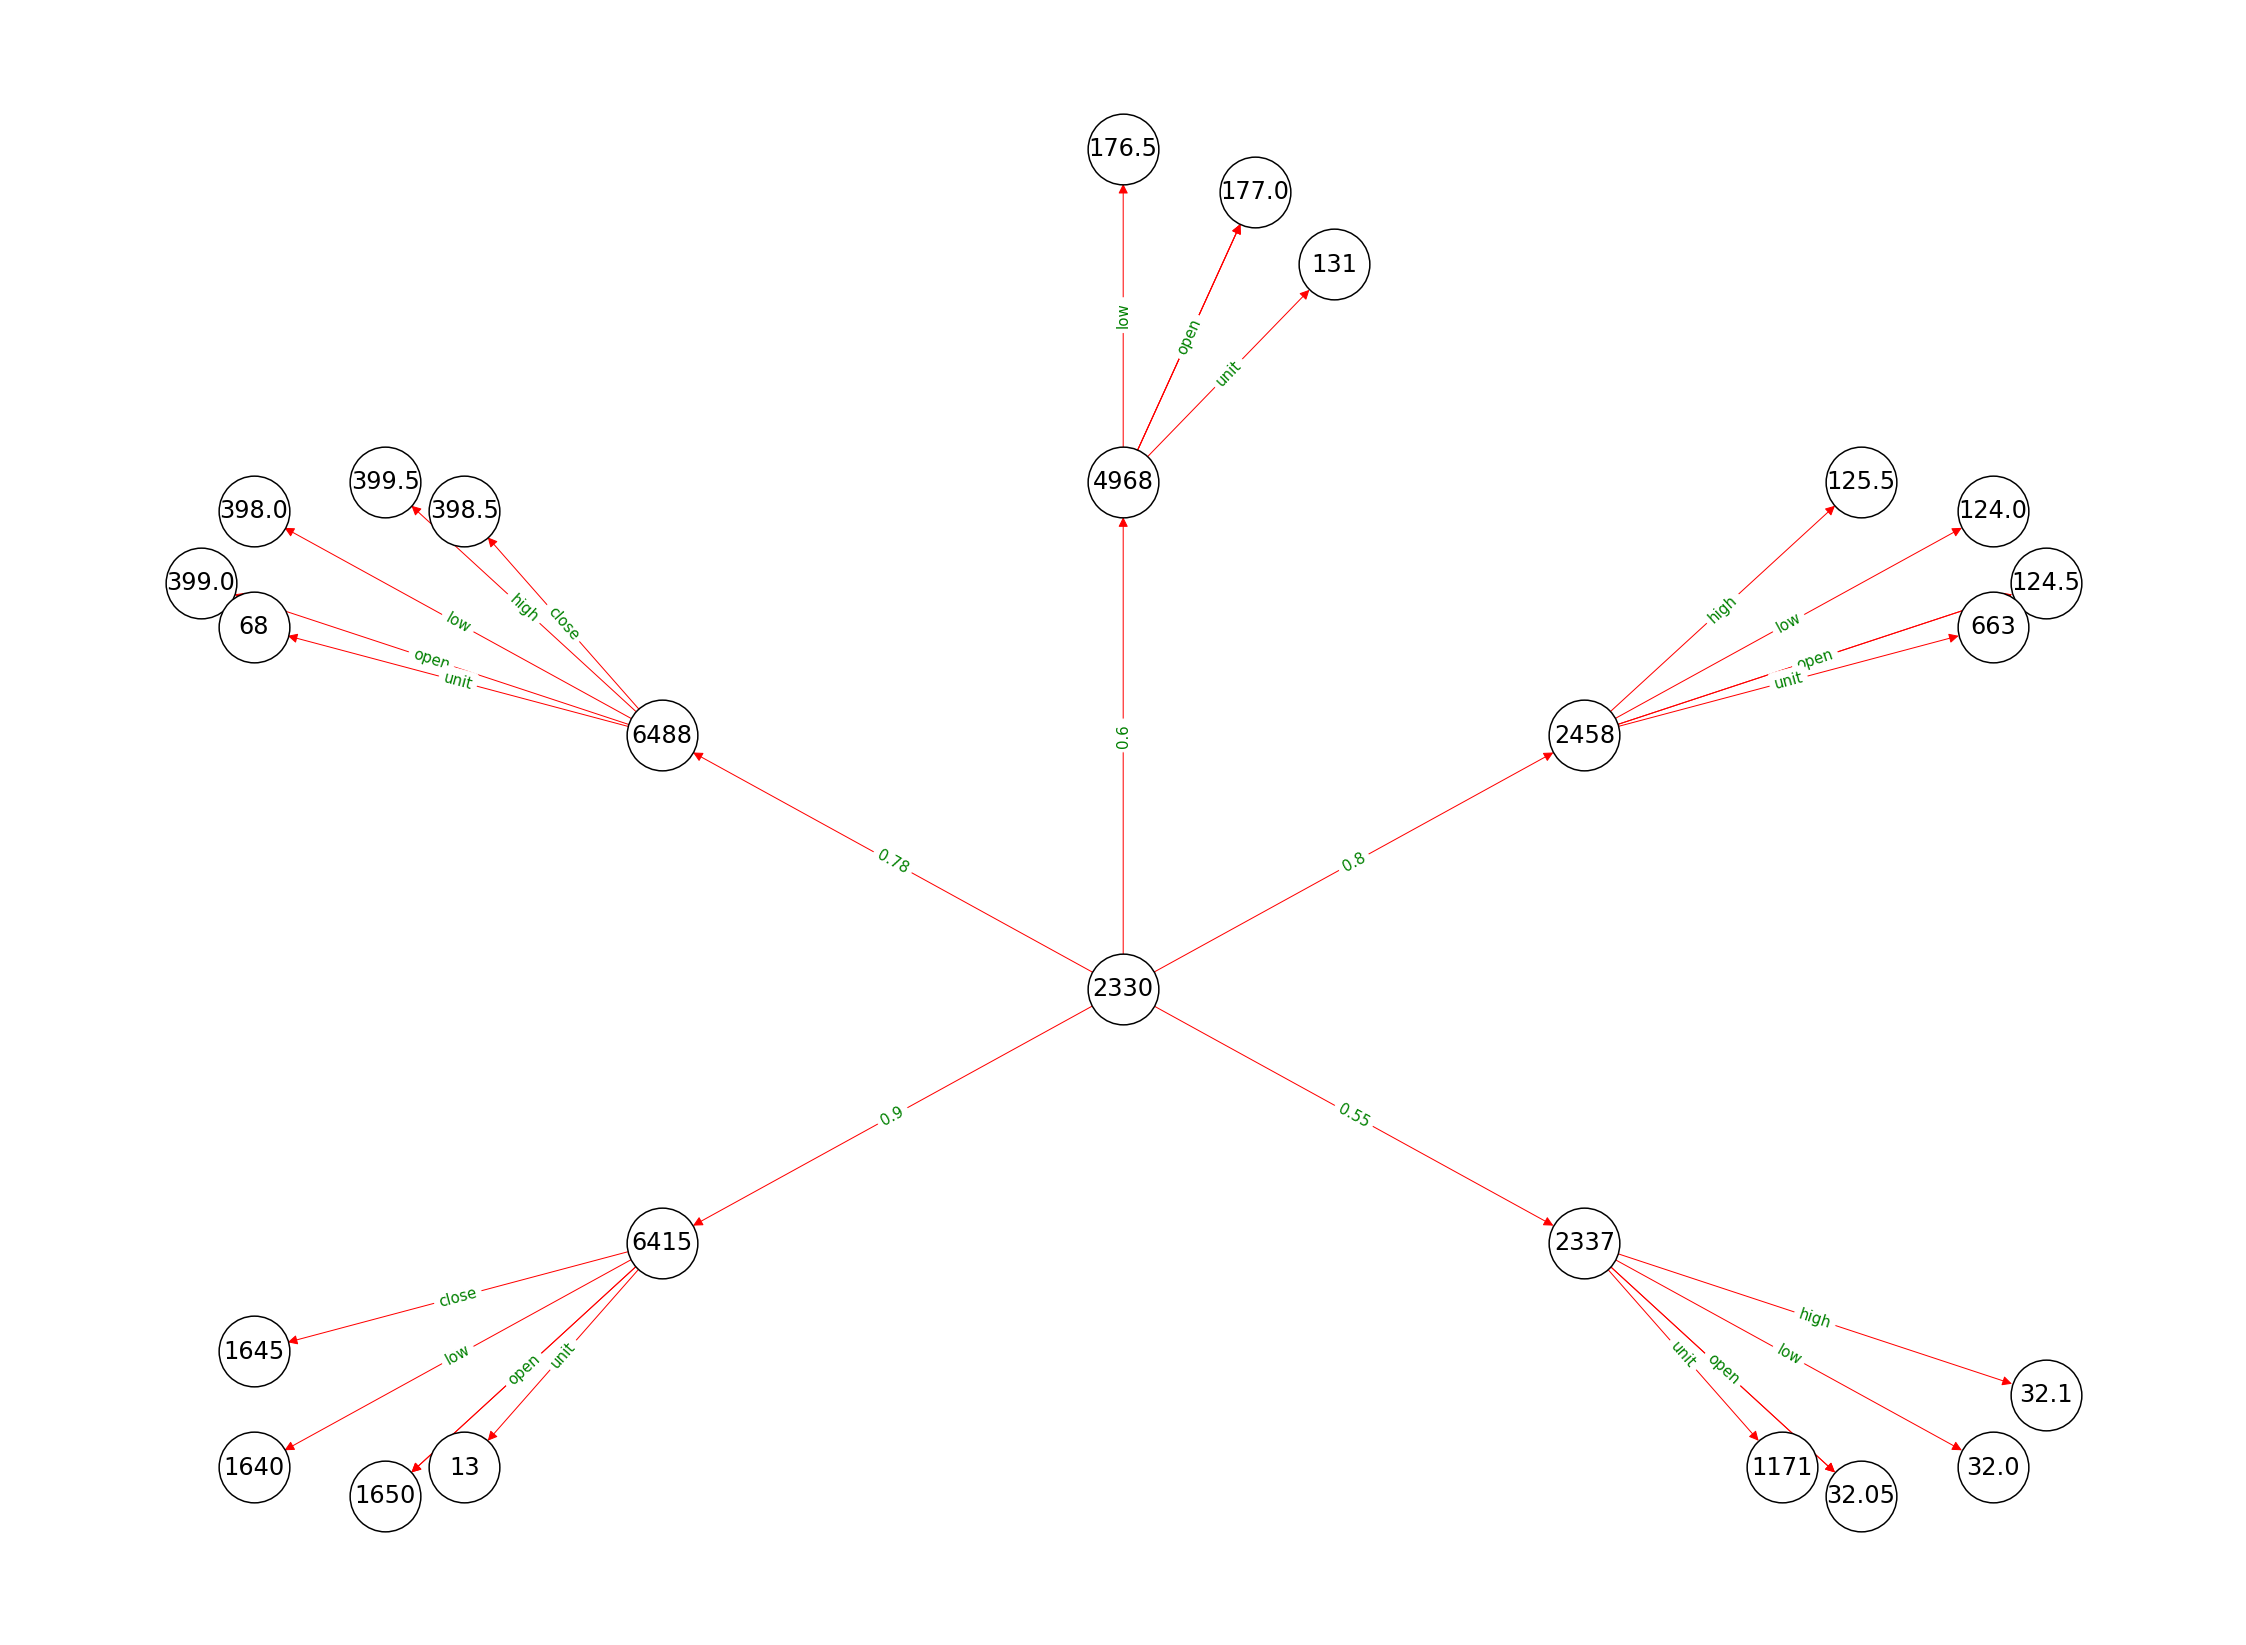

In [211]:
if text in d['symbol']:

    text=text.split("/")[1]
    stock_sim=pd.read_csv('stock_similarity/'+text+'.csv',index_col=0)

    dic = {'From':[],'to':[],'relation':[]}

    for n in range(len(stock_sim)):
        dic['From'].append(str(stock_sim['From'][n]))
        dic['to'].append(str(stock_sim['to'][n]))
        dic['relation'].append(stock_sim['relation'][n])

    for i in stock_sim['to']:
        K_data = intraday.chart(apiToken=api,symbolId=i)
        close=K_data.iloc[0]['close']
        high=K_data.iloc[0]['high']
        low=K_data.iloc[0]['low']
        open=K_data.iloc[0]['open']
        unit=K_data.iloc[0]['unit']

        for n in range(5):
            dic['From'].append(str(i))
        dic['to'].append(str(close))
        dic['to'].append(str(high))
        dic['to'].append(str(low))
        dic['to'].append(str(open))
        dic['to'].append(str(unit))
        dic['relation'].append('close')
        dic['relation'].append('high')
        dic['relation'].append('low')
        dic['relation'].append('open')
        dic['relation'].append('unit')

    df = pd.DataFrame(dic)

    #繪圖
    node_dic = {}
    for i in df['From']:
        node_dic[str(i)]=[]
        for j in df[df['From']==i]['to']:
            node_dic[i].append(j)

    layout={}

    #中心連出去
    layout[keyword]=[0,0]
    layout[node_dic[keyword][0]]=[0,0.175] #1234
    layout[node_dic[keyword][1]]=[0.0875,0.0875]
    layout[node_dic[keyword][2]]=[0.0875,-0.0875]
    layout[node_dic[keyword][3]]=[-0.0875,0.0875]
    layout[node_dic[keyword][4]]=[-0.0875,-0.0875]


    #第一支相關聯的股票
    layout[node_dic[node_dic[keyword][0]][0]]=[-0.04,0.25]
    layout[node_dic[node_dic[keyword][0]][1]]=[-0.025,0.275]
    layout[node_dic[node_dic[keyword][0]][2]]=[0,0.29]
    layout[node_dic[node_dic[keyword][0]][3]]=[0.025,0.275]
    layout[node_dic[node_dic[keyword][0]][4]]=[0.04,0.25]

    layout[node_dic[node_dic[keyword][1]][0]]=[0.125,0.165]
    layout[node_dic[node_dic[keyword][1]][1]]=[0.14,0.175]
    layout[node_dic[node_dic[keyword][1]][2]]=[0.165,0.165]
    layout[node_dic[node_dic[keyword][1]][3]]=[0.175,0.14]
    layout[node_dic[node_dic[keyword][1]][4]]=[0.165,0.125]

    layout[node_dic[node_dic[keyword][2]][0]]=[0.165,-0.125]
    layout[node_dic[node_dic[keyword][2]][1]]=[0.175,-0.14]
    layout[node_dic[node_dic[keyword][2]][2]]=[0.165,-0.165]
    layout[node_dic[node_dic[keyword][2]][3]]=[0.14,-0.175]
    layout[node_dic[node_dic[keyword][2]][4]]=[0.125,-0.165]

    layout[node_dic[node_dic[keyword][3]][0]]=[-0.125,0.165]
    layout[node_dic[node_dic[keyword][3]][1]]=[-0.14,0.175]
    layout[node_dic[node_dic[keyword][3]][2]]=[-0.165,0.165]
    layout[node_dic[node_dic[keyword][3]][3]]=[-0.175,0.14]
    layout[node_dic[node_dic[keyword][3]][4]]=[-0.165,0.125]


    layout[node_dic[node_dic[keyword][4]][0]]=[-0.165,-0.125]
    layout[node_dic[node_dic[keyword][4]][1]]=[-0.175,-0.14]
    layout[node_dic[node_dic[keyword][4]][1]]=[-0.175,-0.14]
    layout[node_dic[node_dic[keyword][4]][2]]=[-0.165,-0.165]
    layout[node_dic[node_dic[keyword][4]][3]]=[-0.14,-0.175]
    layout[node_dic[node_dic[keyword][4]][4]]=[-0.125,-0.165]

    def draw_kg(pairs):
        k_graph = nx.from_pandas_edgelist(pairs, 'From', 'to',
                create_using=nx.MultiDiGraph())

        node_deg = nx.degree(k_graph)
        #layout = nx.spring_layout(k_graph) #nx.spring_layout(k_graph)#, k=0.15, iterations=20)
        plt.figure(num=None, figsize=(40, 30))#, dpi=80)

        nx.draw_networkx(
            k_graph,
            node_size=5000,#[int(deg[1]) * 500 for deg in node_deg],
            arrowsize=20,
            linewidths=1.5,
            pos=layout,
            edge_color='red',
            edgecolors='black',
            node_color='white',
            font_size=24
            )
        labels = dict(zip(list(zip(pairs.From, pairs.to)),
                      pairs['relation'].tolist()))
        nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,font_size=15,
                                     font_color='g')
        plt.axis('off')
        #plt.show()
        plt.savefig('graph.png')
        chat_id = update.message.chat_id
        bot.send_photo(chat_id=chat_id, photo=open('graph.png', 'rb'))

    draw_kg(df)

# 用來修改的程式碼

In [213]:
# Initial Flask app
app = Flask(__name__)

# Initial bot by Telegram access token
bot = telegram.Bot(token=config['TELEGRAM']['ACCESS_TOKEN'])
stock = None
api = '51714d20eae11ba0c9c9647cab45da4b'

s=0
@app.route('/hook', methods=['POST'])
def webhook_handler():
    if request.method == "POST":
        update = telegram.Update.de_json(request.get_json(force=True), bot)
        # Update dispatcher process that handler to process this message
        dispatcher.process_update(update)
    return 'ok'

## reply message
def reply_handler(bot, update):
    text = update.message.text #使用者鍵入的值
    if text == '/start':
        #update.message.reply_text('do u want /search stock symbolId or check stock /data?')
        d = pd.read_csv('成交金額前20大.csv',index_col=0)
        update.message.reply_text('請選擇下列其中一支股票：\n'+d.to_string(index=False))
    elif text in d['symbol']:
        text=text.split("/")[1]
        stock_sim=pd.read_csv('stock_similarity/'+text+'.csv',index_col=0)
        
        dic = {'From':[],'to':[],'relation':[]}

        for n in range(len(stock_sim)):
            dic['From'].append(str(stock_sim['From'][n]))
            dic['to'].append(str(stock_sim['to'][n]))
            dic['relation'].append(stock_sim['relation'][n])

        for i in stock_sim['to']:
            K_data = intraday.chart(apiToken=api,symbolId=i)
            close=K_data.iloc[0]['close']
            high=K_data.iloc[0]['high']
            low=K_data.iloc[0]['low']
            open=K_data.iloc[0]['open']
            unit=K_data.iloc[0]['unit']

            for n in range(5):
                dic['From'].append(str(i))
            dic['to'].append(str(close))
            dic['to'].append(str(high))
            dic['to'].append(str(low))
            dic['to'].append(str(open))
            dic['to'].append(str(unit))
            dic['relation'].append('close')
            dic['relation'].append('high')
            dic['relation'].append('low')
            dic['relation'].append('open')
            dic['relation'].append('unit')

        df = pd.DataFrame(dic)
        
        #繪圖
        node_dic = {}
        for i in df['From']:
            node_dic[str(i)]=[]
            for j in df[df['From']==i]['to']:
                node_dic[i].append(j)
        
        keyword = text
        layout={}

        #中心連出去
        layout[keyword]=[0,0]
        layout[node_dic[keyword][0]]=[0,0.175] #1234
        layout[node_dic[keyword][1]]=[0.0875,0.0875]
        layout[node_dic[keyword][2]]=[0.0875,-0.0875]
        layout[node_dic[keyword][3]]=[-0.0875,0.0875]
        layout[node_dic[keyword][4]]=[-0.0875,-0.0875]


        #第一支相關聯的股票
        layout[node_dic[node_dic[keyword][0]][0]]=[-0.04,0.25]
        layout[node_dic[node_dic[keyword][0]][1]]=[-0.025,0.275]
        layout[node_dic[node_dic[keyword][0]][2]]=[0,0.29]
        layout[node_dic[node_dic[keyword][0]][3]]=[0.025,0.275]
        layout[node_dic[node_dic[keyword][0]][4]]=[0.04,0.25]

        layout[node_dic[node_dic[keyword][1]][0]]=[0.125,0.165]
        layout[node_dic[node_dic[keyword][1]][1]]=[0.14,0.175]
        layout[node_dic[node_dic[keyword][1]][2]]=[0.165,0.165]
        layout[node_dic[node_dic[keyword][1]][3]]=[0.175,0.14]
        layout[node_dic[node_dic[keyword][1]][4]]=[0.165,0.125]

        layout[node_dic[node_dic[keyword][2]][0]]=[0.165,-0.125]
        layout[node_dic[node_dic[keyword][2]][1]]=[0.175,-0.14]
        layout[node_dic[node_dic[keyword][2]][2]]=[0.165,-0.165]
        layout[node_dic[node_dic[keyword][2]][3]]=[0.14,-0.175]
        layout[node_dic[node_dic[keyword][2]][4]]=[0.125,-0.165]

        layout[node_dic[node_dic[keyword][3]][0]]=[-0.125,0.165]
        layout[node_dic[node_dic[keyword][3]][1]]=[-0.14,0.175]
        layout[node_dic[node_dic[keyword][3]][2]]=[-0.165,0.165]
        layout[node_dic[node_dic[keyword][3]][3]]=[-0.175,0.14]
        layout[node_dic[node_dic[keyword][3]][4]]=[-0.165,0.125]


        layout[node_dic[node_dic[keyword][4]][0]]=[-0.165,-0.125]
        layout[node_dic[node_dic[keyword][4]][1]]=[-0.175,-0.14]
        layout[node_dic[node_dic[keyword][4]][1]]=[-0.175,-0.14]
        layout[node_dic[node_dic[keyword][4]][2]]=[-0.165,-0.165]
        layout[node_dic[node_dic[keyword][4]][3]]=[-0.14,-0.175]
        layout[node_dic[node_dic[keyword][4]][4]]=[-0.125,-0.165]
        
        def draw_kg(pairs):
            k_graph = nx.from_pandas_edgelist(pairs, 'From', 'to',
                    create_using=nx.MultiDiGraph())

            node_deg = nx.degree(k_graph)
            #layout = nx.spring_layout(k_graph) #nx.spring_layout(k_graph)#, k=0.15, iterations=20)
            plt.figure(num=None, figsize=(40, 30))#, dpi=80)

            nx.draw_networkx(
                k_graph,
                node_size=5000,#[int(deg[1]) * 500 for deg in node_deg],
                arrowsize=20,
                linewidths=1.5,
                pos=layout,
                edge_color='red',
                edgecolors='black',
                node_color='white',
                font_size=24
                )
            labels = dict(zip(list(zip(pairs.From, pairs.to)),
                          pairs['relation'].tolist()))
            nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,font_size=15,
                                         font_color='g')
            plt.axis('off')
            #plt.show()
            plt.savefig('graph.png')
            chat_id = update.message.chat_id
            bot.send_photo(chat_id=chat_id, photo=open('graph.png', 'rb'))
            
        draw_kg(df)
        
    else:
        update.message.reply_text('I don\'t know what u want')
            
# This class dispatches all kinds of updates to its registered handlers.
dispatcher = Dispatcher(bot, None)
dispatcher.add_handler(MessageHandler(Filters.text, reply_handler))

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Jun/2020 17:15:36] "POST /hook HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2020 17:15:39] "POST /hook HTTP/1.1" 200 -


# 可能會用到的api

In [52]:
meta = intraday.meta(apiToken=api,symbolId='2330',output='raw')
meta

{'canDayBuySell': True,
 'canDaySellBuy': True,
 'canShortLend': True,
 'canShortMargin': True,
 'currency': 'TWD',
 'industryZhTw': '半導體業',
 'isIndex': False,
 'isSuspended': False,
 'isTerminated': False,
 'isWarrant': False,
 'nameZhTw': '台積電',
 'priceHighLimit': 350.5,
 'priceLowLimit': 287.5,
 'priceReference': 319,
 'typeZhTw': '一般股票',
 'volumePerUnit': 1000}

In [55]:
quote = intraday.quote(apiToken=api,symbolId='2330',output='raw')
quote

{'isCloseDelayed': False,
 'isClosed': False,
 'isHalting': False,
 'isOpenDelayed': False,
 'order': {'bestAsks': [{'price': 321.5, 'unit': 44, 'volume': 44000},
   {'price': 322, 'unit': 464, 'volume': 464000},
   {'price': 322.5, 'unit': 328, 'volume': 328000},
   {'price': 323, 'unit': 617, 'volume': 617000},
   {'price': 323.5, 'unit': 682, 'volume': 682000}],
  'bestBids': [{'price': 319, 'unit': 623, 'volume': 623000},
   {'price': 319.5, 'unit': 414, 'volume': 414000},
   {'price': 320, 'unit': 759, 'volume': 759000},
   {'price': 320.5, 'unit': 501, 'volume': 501000},
   {'price': 321, 'unit': 894, 'volume': 894000}],
  'at': '2020-06-10T03:20:52.880Z'},
 'priceOpen': {'at': '2020-06-10T01:00:00.629Z', 'price': 319},
 'isCurbing': False,
 'isTrial': False,
 'total': {'at': '2020-06-10T03:20:52.880Z',
  'unit': 24552,
  'volume': 24552000},
 'trial': {'at': '2020-06-10T00:59:58.822Z',
  'price': 319,
  'unit': 2458,
  'volume': 2458000},
 'priceHigh': {'at': '2020-06-10T02:09:3

In [59]:
K_data = intraday.chart(apiToken=api,symbolId='2330')#,output='raw')
#每一分鐘的收盤價、最高價、最低價、開盤價，分K資料（每分鐘的開盤價、收盤價、最高價以及最低價，還有在這一分之內的交易量總合所組成）
K_data

,at,close,high,low,open,unit,volume
0,2020-06-10 01:01:00+00:00,319.0,319.0,318.5,319.0,2706,2706000
1,2020-06-10 01:02:00+00:00,319.0,319.0,318.5,318.5,224,224000
2,2020-06-10 01:03:00+00:00,318.5,319.0,318.5,319.0,283,283000
3,2020-06-10 01:04:00+00:00,318.5,319.0,318.5,318.5,154,154000
4,2020-06-10 01:05:00+00:00,318.5,319.0,318.5,318.5,290,290000
5,2020-06-10 01:06:00+00:00,318.0,319.0,318.0,318.5,374,374000
6,2020-06-10 01:07:00+00:00,318.0,318.5,318.0,318.0,103,103000
7,2020-06-10 01:08:00+00:00,318.5,318.5,318.0,318.0,282,282000
8,2020-06-10 01:09:00+00:00,318.5,319.0,318.0,318.0,202,202000
9,2020-06-10 01:10:00+00:00,318.5,319.0,318.5,318.5,36,36000


#### 股票資訊

In [70]:
K_data = intraday.chart(apiToken=api,symbolId=text)
#每一分鐘的收盤價、最高價、最低價、開盤價，分K資料（每分鐘的開盤價、收盤價、最高價以及最低價，還有在這一分之內的交易量總合所組成）

close=K_data.iloc[-1,:]['close']
high=K_data.iloc[-1,:]['high']
low=K_data.iloc[-1,:]['low']
open=K_data.iloc[-1,:]['open']
unit=K_data.iloc[-1,:]['unit']
l = [close,high,low,open,unit]

dic={'From':[stock[0]]*5, # stock[0]為使用者鍵入股票之相似度前五中其一股票示意
     'to':l,
     'relation':['close','high','low','open','unit']}

df = pd.DataFrame(dic)

at        2020-06-10 03:24:00+00:00
close                         321.5
high                          321.5
low                             321
open                          321.5
unit                             55
volume                        55000
Name: 143, dtype: object


## 測試

In [107]:
text='2330' #使用者鍵入股票代碼
stock_sim=pd.read_csv('/Users/Rebeca/Fintech_中信專案/stock_similarity/'+text+'.csv',index_col=0) 
stock_sim

,From,to,relation
0,2330,4968,0.60
1,2330,2458,0.80
2,2330,2337,0.55
3,2330,6488,0.78
4,2330,6415,0.90


In [167]:
dic = {'From':[],'to':[],'relation':[]}

for n in range(len(stock_sim)):
    dic['From'].append(str(stock_sim['From'][n]))
    dic['to'].append(str(stock_sim['to'][n]))
    dic['relation'].append(stock_sim['relation'][n])

for i in stock_sim['to']:
    K_data = intraday.chart(apiToken=api,symbolId=i)
    close=K_data.iloc[0]['close']
    high=K_data.iloc[0]['high']
    low=K_data.iloc[0]['low']
    open=K_data.iloc[0]['open']
    unit=K_data.iloc[0]['unit']

    for n in range(5):
        dic['From'].append(str(i))
    dic['to'].append(str(close))
    dic['to'].append(str(high))
    dic['to'].append(str(low))
    dic['to'].append(str(open))
    dic['to'].append(str(unit))
    dic['relation'].append('close')
    dic['relation'].append('high')
    dic['relation'].append('low')
    dic['relation'].append('open')
    dic['relation'].append('unit')
    
df = pd.DataFrame(dic)

### 繪圖

In [168]:
node_dic = {}
for i in df['From']:
    node_dic[str(i)]=[]
    for j in df[df['From']==i]['to']:
        node_dic[i].append(j)
print(node_dic)

{'2330': ['4968', '2458', '2337', '6488', '6415'], '4968': ['177.0', 177, '176.5', (177+0j), '131'], '2458': ['124.5', 125, '124.0', (124.5+0j), '663'], '2337': ['32.05', 32, '32.0', (32.05+0j), '1171'], '6488': ['398.5', 399, '398.0', (399+0j), '68'], '6415': ['1645', 1650, '1640', (1650+0j), '13']}


In [169]:
# 設定位置
keyword=text ##要查詢的股票

layout={}

#中心連出去
layout[keyword]=[0,0]
layout[node_dic[keyword][0]]=[0,0.175] #1234
layout[node_dic[keyword][1]]=[0.0875,0.0875]
layout[node_dic[keyword][2]]=[0.0875,-0.0875]
layout[node_dic[keyword][3]]=[-0.0875,0.0875]
layout[node_dic[keyword][4]]=[-0.0875,-0.0875]


#第一支相關聯的股票
layout[node_dic[node_dic[keyword][0]][0]]=[-0.04,0.25]
layout[node_dic[node_dic[keyword][0]][1]]=[-0.025,0.275]
layout[node_dic[node_dic[keyword][0]][2]]=[0,0.29]
layout[node_dic[node_dic[keyword][0]][3]]=[0.025,0.275]
layout[node_dic[node_dic[keyword][0]][4]]=[0.04,0.25]

layout[node_dic[node_dic[keyword][1]][0]]=[0.125,0.165]
layout[node_dic[node_dic[keyword][1]][1]]=[0.14,0.175]
layout[node_dic[node_dic[keyword][1]][2]]=[0.165,0.165]
layout[node_dic[node_dic[keyword][1]][3]]=[0.175,0.14]
layout[node_dic[node_dic[keyword][1]][4]]=[0.165,0.125]

layout[node_dic[node_dic[keyword][2]][0]]=[0.165,-0.125]
layout[node_dic[node_dic[keyword][2]][1]]=[0.175,-0.14]
layout[node_dic[node_dic[keyword][2]][2]]=[0.165,-0.165]
layout[node_dic[node_dic[keyword][2]][3]]=[0.14,-0.175]
layout[node_dic[node_dic[keyword][2]][4]]=[0.125,-0.165]

layout[node_dic[node_dic[keyword][3]][0]]=[-0.125,0.165]
layout[node_dic[node_dic[keyword][3]][1]]=[-0.14,0.175]
layout[node_dic[node_dic[keyword][3]][2]]=[-0.165,0.165]
layout[node_dic[node_dic[keyword][3]][3]]=[-0.175,0.14]
layout[node_dic[node_dic[keyword][3]][4]]=[-0.165,0.125]


layout[node_dic[node_dic[keyword][4]][0]]=[-0.165,-0.125]
layout[node_dic[node_dic[keyword][4]][1]]=[-0.175,-0.14]
layout[node_dic[node_dic[keyword][4]][1]]=[-0.175,-0.14]
layout[node_dic[node_dic[keyword][4]][2]]=[-0.165,-0.165]
layout[node_dic[node_dic[keyword][4]][3]]=[-0.14,-0.175]
layout[node_dic[node_dic[keyword][4]][4]]=[-0.125,-0.165]

In [228]:
def draw_kg(pairs):
    k_graph = nx.from_pandas_edgelist(pairs, 'From', 'to',
            create_using=nx.MultiDiGraph())
    
    node_deg = nx.degree(k_graph)
    #layout = nx.spring_layout(k_graph) #nx.spring_layout(k_graph)#, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(40, 30))#, dpi=80)

    nx.draw_networkx(
        k_graph,
        node_size=5000,#[int(deg[1]) * 500 for deg in node_deg],
        arrowsize=20,
        linewidths=1.5,
        pos=layout,
        edge_color='red',
        edgecolors='black',
        node_color='white',
        font_size=24
        )
    labels = dict(zip(list(zip(pairs.From, pairs.to)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,font_size=15,
                                 font_color='g')
    plt.axis('off')
    plt.show()
draw_kg(df)

KeyError: 'From'

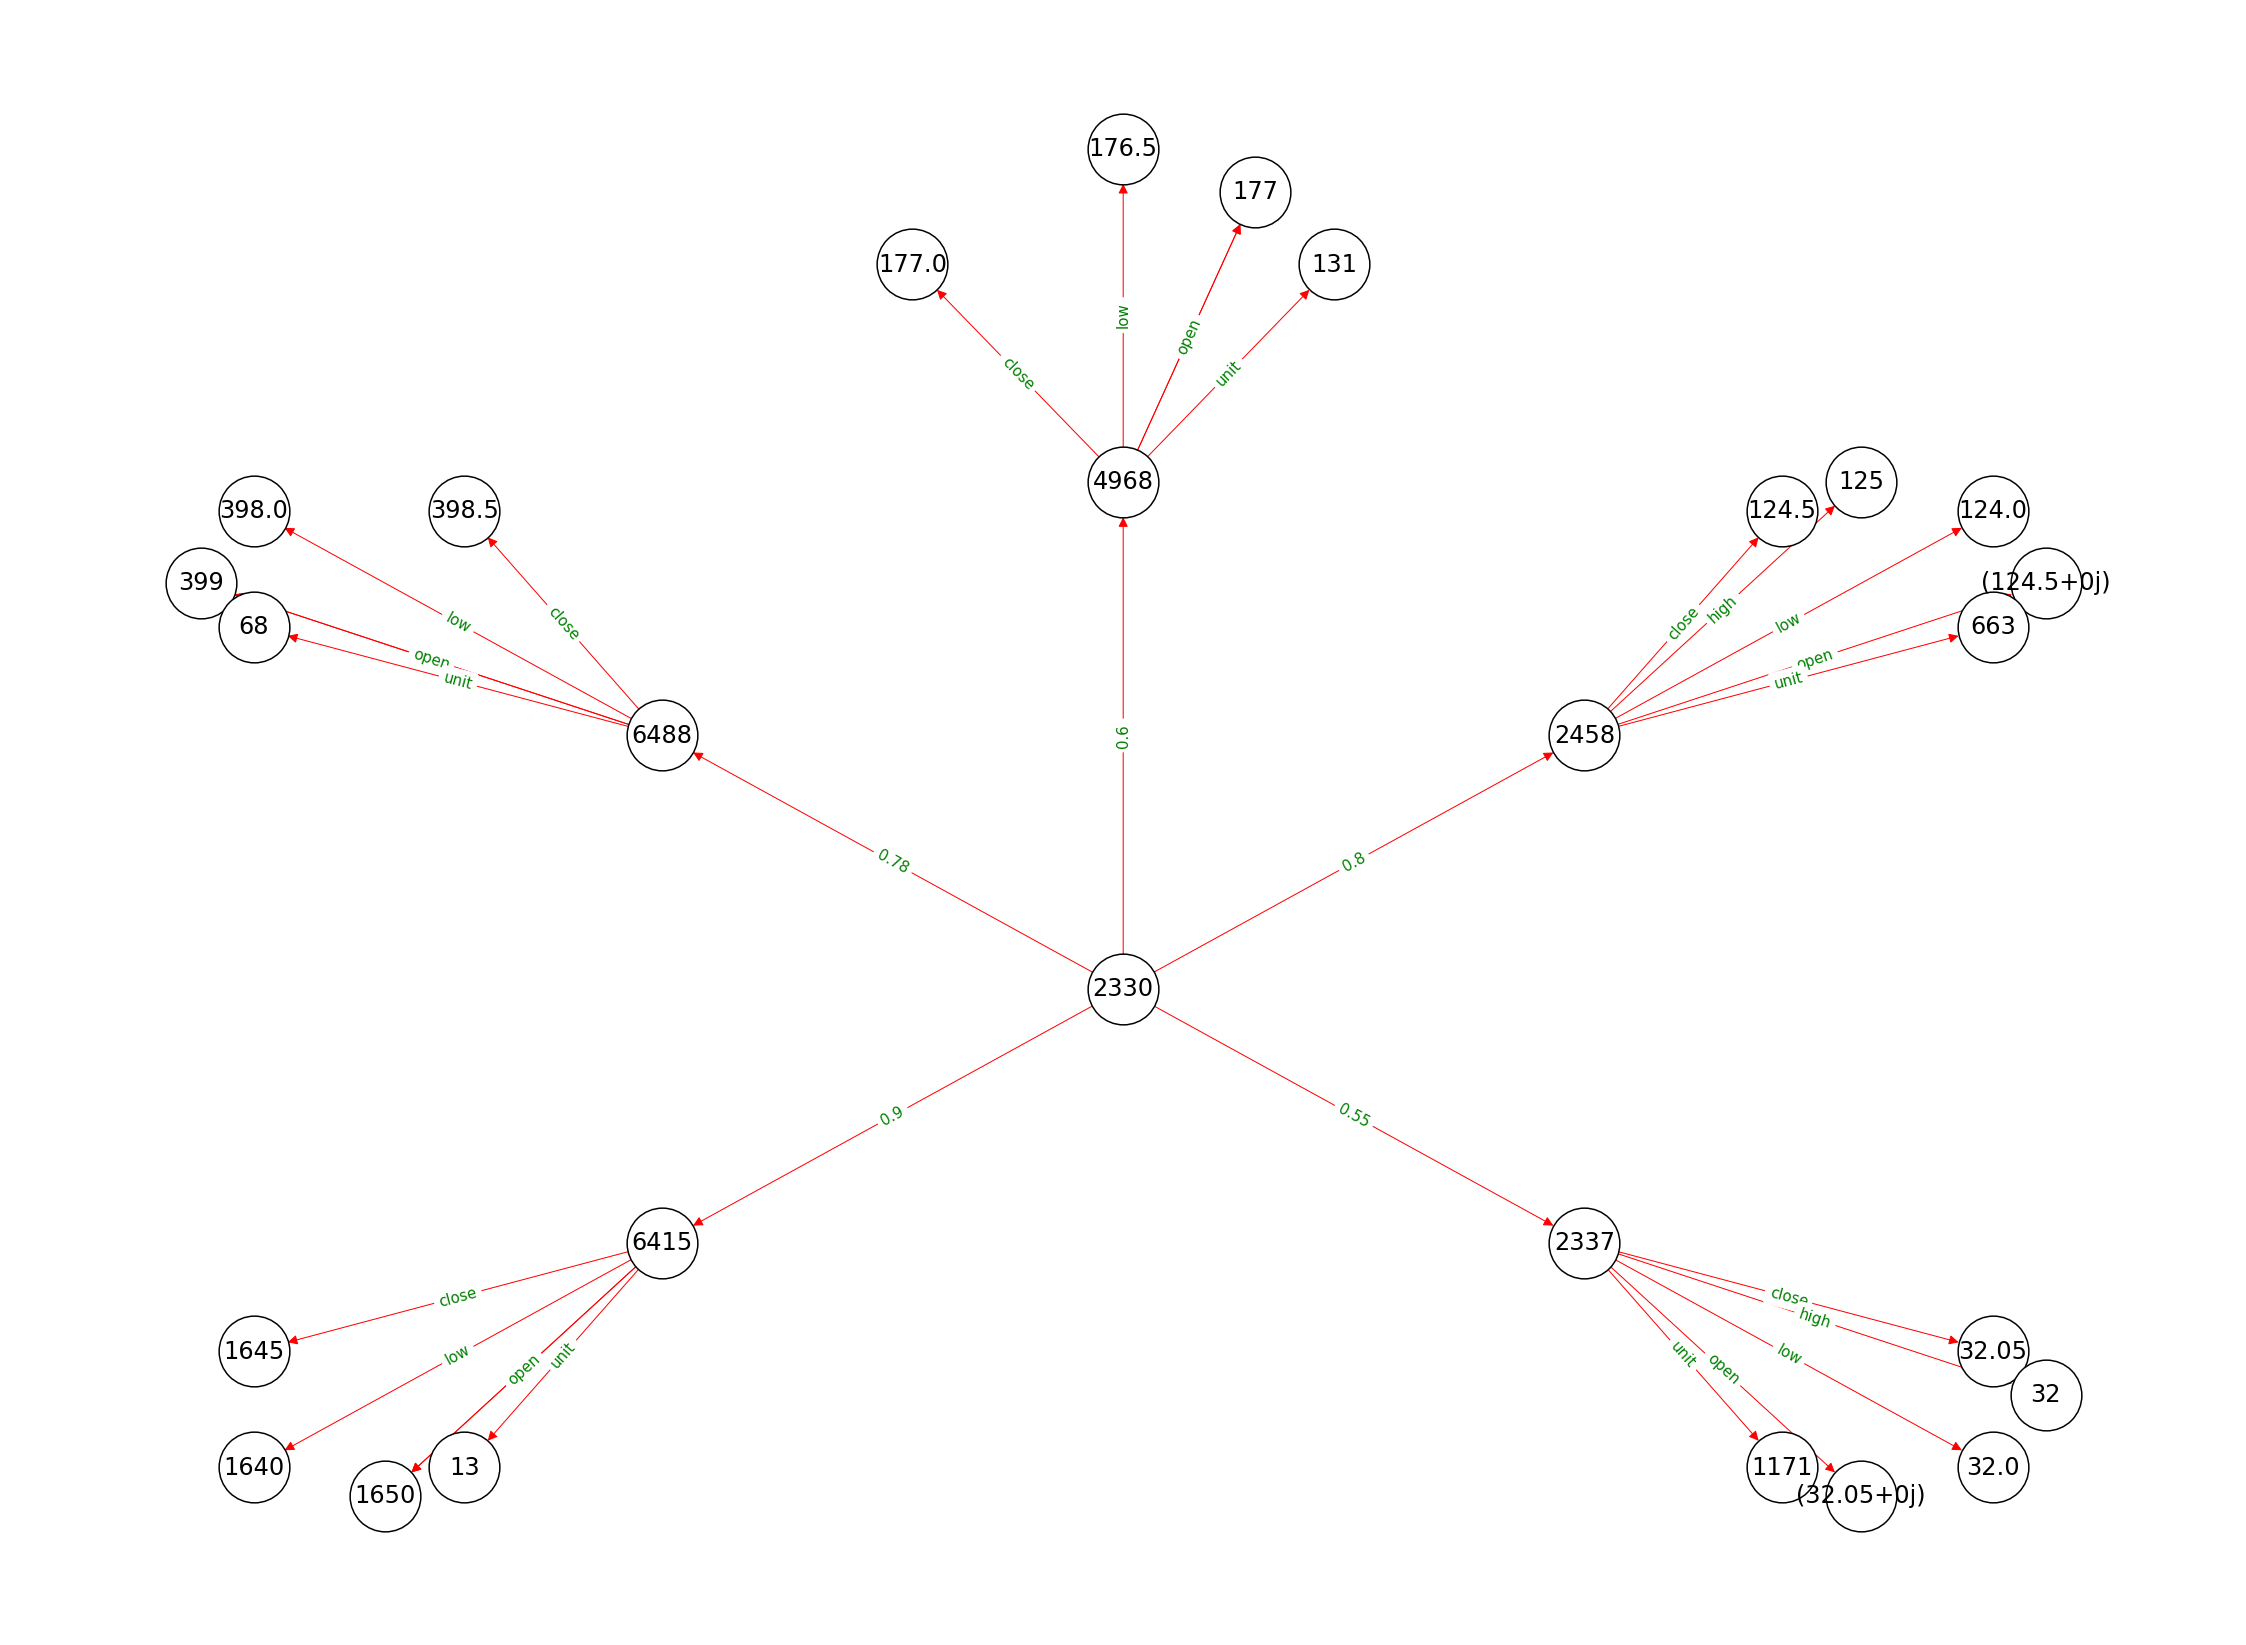

In [172]:
draw_kg(df)

# 蘆葦中原始的程式碼

In [ ]:
# Initial Flask app
app = Flask(__name__)

# Initial bot by Telegram access token
bot = telegram.Bot(token=config['TELEGRAM']['ACCESS_TOKEN'])
stock = None
api = '51714d20eae11ba0c9c9647cab45da4b'

s=0
@app.route('/hook', methods=['POST'])
def webhook_handler():
    if request.method == "POST":
        update = telegram.Update.de_json(request.get_json(force=True), bot)
        # Update dispatcher process that handler to process this message
        dispatcher.process_update(update)
    return 'ok'

## reply message
def reply_handler(bot, update):
    global s
    global api
    global stock
    global df
    text = update.message.text
    if text == '/start':
        update.message.reply_text('do u want /search stock symbolId or check stock /data?')
        s = 1
    elif 'restart' in text and s == 1:
        stock = None
        update.message.reply_text('do u want /search stock symbolId or check stock /data?')
    elif s == 0:
        update.message.reply_text('please enter \'/start\' to start fintech')
    else:
        if stock is None:
            if 'search' in text:
                s = 2
                update.message.reply_text('enter the company name')
            elif s == 2:
                df1 = df[df['industry'].isin([text])].reset_index(drop = True)
                try:
                    name = df1['symbol_id'][0]
                    update.message.reply_text(name)
                    s = 1
                except:
                    update.message.reply_text('no this company')
                    s = 1
            elif 'data' in text:
                s = 3
                update.message.reply_text('enter the company symbolId')
            elif s == 3:
                meta = intraday.meta(apiToken=api,symbolId=text,output='raw')
                try:
                    e = meta['error']['message']
                    update.message.reply_text(meta['error']['message'])
                    s = 1
                except:
                    stock = text
                    update.message.reply_text('What do u want to search with ' + meta['nameZhTw']+'\nu can enter:\n/priceReference\n/priceOpen\n/priceNow\n/bestBidsandAsks\n/graph\n/restart')
                    s = 1
            else:
                update.message.reply_text('I don\'t know what u want')
        elif 'priceReference' in text:
            meta = intraday.meta(apiToken=api,symbolId=stock,output='raw')
            priceReference = str(meta['priceReference'])
            priceHighLimit = str(meta['priceHighLimit'])
            priceLowLimit = str(meta['priceLowLimit'])
            update.message.reply_text('Today priceReference\npriceReference: {}\npriceHighLimit: {}\npriceLowLimit: {}'.format(priceReference,priceHighLimit,priceLowLimit))
        elif 'priceOpen' in text:
            quote = intraday.quote(apiToken=api,symbolId=stock,output='raw')
            priceOpen = str(quote['priceOpen']['price'])
            priceHigh = str(quote['priceHigh']['price'])
            priceLow = str(quote['priceLow']['price'])
            update.message.reply_text('Today priceOpen\npriceOpen: {}\npriceHigh: {}\npriceLow: {}'.format(priceOpen,priceHigh,priceLow))
        elif 'priceNow' in text:
            quote = intraday.quote(apiToken=api,symbolId=stock,output='raw')
            price = str(quote['trade']['price'])
            unit = str(quote['trade']['unit'])
            at = quote['trade']['at']
            at = str(datetime.strptime(at[0:-5],"%Y-%m-%dT%H:%M:%S")+timedelta(hours=8))
            update.message.reply_text('Newest trade\ntrade price: {}\ntrade unit: {}\ntrade time: {}'.format(price,unit,at))
        elif 'bestBidsandAsks' in text:
            quote = intraday.quote(apiToken=api,symbolId=stock,output='raw')
            at = quote['order']['at']
            at = str(datetime.strptime(at[0:-5],"%Y-%m-%dT%H:%M:%S")+timedelta(hours=8))
            bestBids = quote['order']['bestBids']
            bestAsks = quote['order']['bestAsks']
            BidsUnit = [n['unit'] for n in bestBids]
            BidsUnit.reverse()
            BidsPrice = [n['price'] for n in bestBids]
            BidsPrice.reverse()
            AsksPrice = [n['price'] for n in bestAsks]
            AsksUnit = [n['unit'] for n in bestAsks]
            df = pd.DataFrame({'BidsUnit':BidsUnit,'BidsPrice':BidsPrice,'AsksPrice':AsksPrice,'AsksUnit':AsksUnit})
            update.message.reply_text(df.to_string(index=False)+'\ntime: {}'.format(at))
        elif 'graph' in text:
            data = intraday.chart(apiToken=api,symbolId=stock)
            data['time'] = data['at'] - data['at'][0]
            data['date'] = data['at'] - data['at'][0] + timedelta(hours=9) + timedelta(minutes=1)
            # data['date'] = data['date'].strftime('%H:%M')
            def abc(aa):
                aa['time'] = aa['time'].seconds/60+1
                aa['time'] = int(aa['time'])
                aa['date'] = str(aa['date']).split(' ')[2]
                return aa
            data = data.apply(abc,axis=1)
            meta = intraday.meta(apiToken=api,symbolId=stock,output='raw')
            priceLowLimit = meta['priceLowLimit']
            priceHighLimit = meta['priceHighLimit']
            priceReference = meta['priceReference']
            x = list(data['time'])
            y = data['close']
            plt.figure()
            plt.plot(x, y, color='b', linewidth=1.0)
            plt.xticks([0,60,120,180,240,270],['09:00','10:00','11:00','12:00','13:00','13:30'])
            plt.yticks([priceLowLimit,(priceLowLimit+priceReference)/2,priceReference,(priceReference+priceHighLimit)/2,priceHighLimit])
            ax = plt.gca()
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            plt.xlim((0,270))
            plt.ylim((priceLowLimit, priceHighLimit))
            plt.xlabel(r'$time$')
            plt.ylabel(r'$price$')
            y0 = priceReference
            plt.plot([0,270] ,[y0,y0],'k-',lw=0.5)
            plt.fill_between(x,y,y0,where= y<=y0,facecolor='g',interpolate= True,alpha=0.3)
            plt.fill_between(x,y,y0,where= y>=y0,facecolor='r',interpolate= True,alpha=0.3)
            plt.title(stock)
            plt.savefig('graph.jpg')
            chat_id = update.message.chat_id
            image_file = open("graph.jpg")
            bot.send_photo(chat_id=chat_id, photo=image_file)
        else:
            update.message.reply_text('I don\'t know what u want')
            
# This class dispatches all kinds of updates to its registered handlers.
dispatcher = Dispatcher(bot, None)
dispatcher.add_handler(MessageHandler(Filters.text, reply_handler))

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


/Users/Rebeca/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TelegramDeprecationWarning: Old Handler API is deprecated - see https://git.io/fxJuV for details
  exec(code_obj, self.user_global_ns, self.user_ns)
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Jun/2020 20:35:46] "POST /hook HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2020 20:35:49] "POST /hook HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2020 20:36:03] "POST /hook HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2020 20:36:09] "POST /hook HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2020 20:36:14] "POST /hook HTTP/1.1" 200 -


In [234]:
image_file = open("graph.png")

In [233]:
del open

In [235]:
image_file 

<_io.TextIOWrapper name='graph.png' mode='r' encoding='UTF-8'>